### Optimization Strategies for the training process
1. **选择合适的损失函数 (Choosing an appropriate loss function):** Select a loss function that is suitable for your specific task, such as mean squared error for regression problems or cross-entropy for classification problems.

2. **选择合适的优化器 (Choosing an appropriate optimizer):** Use an optimizer that can efficiently update model weights, such as stochastic gradient descent (SGD), Adam, RMSprop, or Adagrad.

3. **学习率调整 (Learning rate scheduling):** Adjust the learning rate during training, either by decreasing it gradually or using adaptive methods like learning rate annealing or cyclical learning rates.

4. **批量归一化 (Batch normalization):** Use batch normalization to stabilize and speed up the training process by normalizing the input features within each mini-batch.

5. **权重初始化 (Weight initialization):** Initialize weights with appropriate strategies such as Xavier/Glorot or He initialization to avoid issues like vanishing or exploding gradients.

6. **正则化 (Regularization):** Apply regularization techniques like L1, L2, or dropout to prevent overfitting and improve generalization.

7. **梯度裁剪 (Gradient clipping):** Limit the size of gradients during backpropagation to avoid exploding gradients, especially in recurrent neural networks (RNNs).

8. **数据增强 (Data augmentation):** Increase the size and diversity of your training dataset by applying random transformations to input data, such as rotations, flips, or color changes.

9. **早停法 (Early stopping):** Stop training when the model's performance on a validation set starts to degrade, preventing overfitting.

10. **迁移学习 (Transfer learning):** Leverage pre-trained models to initialize your model's weights, allowing for faster convergence and better performance, especially when dealing with limited training data.

11. **模型集成 (Model ensembling):** Combine the predictions of multiple models to improve overall performance, often by using techniques like bagging, boosting, or stacking.

In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib as plt
from torchsummary import summary

In [4]:
#torch function
transform=transforms.ToTensor()
mnist_train=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice',train=True, download=False, transform=transform)
mnist_test=torchvision.datasets.MNIST(root='/Users/isabelleliu/Desktop/code practice',train=False, download=False, transform=transform)

#split train into train and validation
train_set, val_set=random_split(mnist_train,[len(mnist_train)-10000,10000])
batch_size=64

#create dataloader use default function
train_loader=DataLoader(train_set,batch_size,shuffle=True)
val_loader=DataLoader(val_set,batch_size,shuffle=True)
test_loader=DataLoader(mnist_test,batch_size,shuffle=True)

In [12]:
class MNISTOPTM(nn.Module):
    def __init__(self):
        super(MNISTOPTM,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=20,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc=nn.Linear(in_features=980,out_features=10)

    def forward(self,inputs,labels=None):
        x=self.conv1(inputs)
        x=F.relu(x)
        x=self.max_pool1(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=self.max_pool2(x)
        x=torch.flatten(x, start_dim=1)
        x=self.fc(x)
        #finds the index (class) with the highest output value for each input image in the batch.
        #element-wise comparison
        #the proportion of correct predictions (1.0 values) in the batch
        #acc=(predicts.argmax(dim=1)==labels).float().mean()(if in batch)
        if labels is not None:
            acc = (torch.argmax(x, dim=1)==labels).float().mean()
            return x, acc
        else:
            return x
    

In [13]:
def train(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

    epoch_num=5
    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()
            predicts,acc=model(images,labels)
            losses=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(losses)
            if batch%200==0:

                print('epoch: {}, batch: {}, loss is: {}, accuracy is: {}'.format(epoch,batch, avg_loss,acc))

            avg_loss.backward()
            optimizer.step()

    torch.save(model.state_dict(),'mnistoptim.pth')
    

In [14]:
model=MNISTOPTM()
train(model)

epoch: 0, batch: 0, loss is: 2.3005712032318115, accuracy is: 0.078125
epoch: 0, batch: 200, loss is: 0.09411603212356567, accuracy is: 0.96875
epoch: 0, batch: 400, loss is: 0.04258349537849426, accuracy is: 0.984375
epoch: 0, batch: 600, loss is: 0.06465505808591843, accuracy is: 0.96875
epoch: 1, batch: 0, loss is: 0.015850096940994263, accuracy is: 1.0
epoch: 1, batch: 200, loss is: 0.0799253061413765, accuracy is: 0.96875
epoch: 1, batch: 400, loss is: 0.029502319172024727, accuracy is: 0.984375
epoch: 1, batch: 600, loss is: 0.003857447998598218, accuracy is: 1.0
epoch: 2, batch: 0, loss is: 0.021352292969822884, accuracy is: 1.0
epoch: 2, batch: 200, loss is: 0.003982602618634701, accuracy is: 1.0
epoch: 2, batch: 400, loss is: 0.006696159020066261, accuracy is: 1.0
epoch: 2, batch: 600, loss is: 0.03783807158470154, accuracy is: 0.984375
epoch: 3, batch: 0, loss is: 0.05362473800778389, accuracy is: 0.984375
epoch: 3, batch: 200, loss is: 0.20194111764431, accuracy is: 0.96875


In [18]:
class MNISTOPTMCHECK(nn.Module):
    def __init__(self):
        super(MNISTOPTMCHECK,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=20,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc=nn.Linear(in_features=980,out_features=10)

    def forward(self,inputs,label=None, check_shape=False, check_content=False):
        output1=self.conv1(inputs)
        output2=F.relu(output1)
        output3=self.max_pool1(output2)
        output4=self.conv2(output3)
        output5=F.relu(output4)
        output6=self.max_pool2(output5)
        output6=torch.flatten(output6, start_dim=1)
        output7=self.fc(output6)
        

        # Choose whether to print the parameter size and output size of each layer of the neural network
        if check_shape:
            print("\n########## print network layer's superparams ##############")
            print("conv1-- kernel_size:{}, padding:{}, stride:{}".format(self.conv1.weight.shape, self.conv1.padding, self.conv1.stride))
            print("conv2-- kernel_size:{}, padding:{}, stride:{}".format(self.conv2.weight.shape, self.conv2.padding, self.conv2.stride))
            print("fc-- weight_size:{}, bias_size_{}".format(self.fc.weight.shape, self.fc.bias.shape))

            print("\n########## print shape of features of every layer ###############")
            print("inputs_shape: {}".format(inputs.shape))
            print("output1_shape: {}".format(output1.shape))
            print("output2_shape: {}".format(output2.shape))
            print("output3_shape: {}".format(output3.shape))
            print("output4_shape: {}".format(output4.shape))
            print("output5_shape: {}".format(output5.shape))
            print("output6_shape: {}".format(output6.shape))
            print("output7_shape: {}".format(output7.shape))

        # Choose whether to print the parameters and output content during training
        if check_content:
            print("\n########## print convolution layer's kernel ###############")
            print("conv1 params -- kernel weights:", self.conv1.weight[0][0])
            print("conv2 params -- kernel weights:", self.conv2.weight[0][0])


            #random channel output
            idx1 = torch.randint(0, output1.shape[1], (1,)).item()
            idx2 = torch.randint(0, output4.shape[1], (1,)).item()
            print("\nThe {}th channel of conv1 layer: ".format(idx1), output1[0][idx1])
            print("The {}th channel of conv2 layer: ".format(idx2), output4[0][idx2])
            print("The output of last layer:", output7[0], '\n')

        # If label is not None, calculate classification accuracy and return
        if label is not None:
            acc = (torch.argmax(F.softmax(output7, dim=1), dim=1)==label).float().mean()
            return output7, acc
        else:
            return output7

In [19]:
def checktrain(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    optimizer=torch.optim.SGD(model.parameters(), lr=0.01)

    epoch_num=1
    for epoch in range(epoch_num):
        for batch,data in enumerate(train_loader):
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()

            if batch ==0 and epoch ==0:
                predicts, acc = model(images, labels, check_shape=True, check_content=False)
            elif batch==401:
                predicts, acc = model(images, labels, check_shape=False, check_content=True)
            else:
                predicts,acc=model(images,labels)

            losses=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(losses)
            if batch%200==0:
                #finds the index (class) with the highest output value for each input image in the batch.
                #element-wise comparison
                #the proportion of correct predictions (1.0 values) in the batch
                #acc=(predicts.argmax(dim=1)==labels).float().mean()
                print('epoch: {}, batch: {}, loss is: {}, accuracy is: {}'.format(epoch,batch, avg_loss,acc))

            avg_loss.backward()
            optimizer.step()


In [20]:
model=MNISTOPTMCHECK()
checktrain(model)


########## print network layer's superparams ##############
conv1-- kernel_size:torch.Size([20, 1, 5, 5]), padding:(2, 2), stride:(1, 1)
conv2-- kernel_size:torch.Size([20, 20, 5, 5]), padding:(2, 2), stride:(1, 1)
fc-- weight_size:torch.Size([10, 980]), bias_size_torch.Size([10])

########## print shape of features of every layer ###############
inputs_shape: torch.Size([64, 1, 28, 28])
output1_shape: torch.Size([64, 20, 28, 28])
output2_shape: torch.Size([64, 20, 28, 28])
output3_shape: torch.Size([64, 20, 14, 14])
output4_shape: torch.Size([64, 20, 14, 14])
output5_shape: torch.Size([64, 20, 14, 14])
output6_shape: torch.Size([64, 980])
output7_shape: torch.Size([64, 10])
epoch: 0, batch: 0, loss is: 2.3134303092956543, accuracy is: 0.09375
epoch: 0, batch: 200, loss is: 1.915852665901184, accuracy is: 0.59375
epoch: 0, batch: 400, loss is: 0.5797892808914185, accuracy is: 0.8125

########## print convolution layer's kernel ###############
conv1 params -- kernel weights: tensor([[-

### Different Dataset

1. **Training set**: This is the largest portion of the dataset and is used to train the model. The model learns from the examples in the training set, adjusting its parameters to minimize the error between the predicted outputs and the true outputs.

2. **Validation set**: This is a separate portion of the dataset used to tune model hyperparameters and make decisions on the model architecture or other aspects of the model. The validation set is used to evaluate the performance of the model during the training process, providing an estimate of how well the model generalizes to unseen data. It is used to prevent overfitting by stopping the training when the performance on the validation set starts to degrade.

3. **Test set**: This is another separate portion of the dataset that is used to evaluate the final performance of the model after the training and hyperparameter tuning processes are complete. The test set provides an unbiased estimate of the model's performance on completely unseen data. It is important not to use the test set during the training or hyperparameter tuning processes to avoid overfitting or introducing bias in the evaluation.


In [32]:
#Validation for refine the model during training process
def train_valid(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

    epoch_num=2
    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()
            predicts,acc=model(images,labels)
            losses=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(losses)
            if batch%200==0:

                print('epoch: {}, batch: {}, loss is: {}, accuracy is: {}'.format(epoch,batch, avg_loss,acc))

            avg_loss.backward()
            optimizer.step()

        ##Evaluate on validation set
        #sets the model in "evaluation mode" (disables certain mechanisms like dropout)
        model.eval()
        valid_acc_set = []
        valid_loss_set = []
        #disables gradient calculation when evaluating the model(not updating weights)
        with torch.no_grad():
            for batch,data in enumerate(val_loader):
                images,labels=data
                images = images.to(device)
                labels = labels.to(device)
                predicts, acc = model(images, labels)
                loss = F.cross_entropy(predicts, labels)
                valid_acc_set.append(acc.item())
                valid_loss_set.append(loss.item())
        valid_acc_mean = sum(valid_acc_set) / len(valid_acc_set)
        valid_loss_mean = sum(valid_loss_set) / len(valid_loss_set)
        print(f"Validation loss: {valid_loss_mean}, Validation accuracy: {valid_acc_mean}")
        # switch the model back to training mode.
        model.train()

    torch.save(model.state_dict(),'mnistoptim_val.pth')
    

In [33]:
model=MNISTOPTM()
train_valid(model)

epoch: 0, batch: 0, loss is: 2.304694414138794, accuracy is: 0.078125
epoch: 0, batch: 200, loss is: 0.06884229183197021, accuracy is: 0.96875
epoch: 0, batch: 400, loss is: 0.08644376695156097, accuracy is: 0.96875
epoch: 0, batch: 600, loss is: 0.18794873356819153, accuracy is: 0.90625
Validation loss: 0.08063567322115325, Validation accuracy: 0.9766122611464968
epoch: 1, batch: 0, loss is: 0.03732699528336525, accuracy is: 0.984375
epoch: 1, batch: 200, loss is: 0.10100637376308441, accuracy is: 0.96875
epoch: 1, batch: 400, loss is: 0.06568636000156403, accuracy is: 0.984375
epoch: 1, batch: 600, loss is: 0.1575223207473755, accuracy is: 0.953125
Validation loss: 0.07345199606761005, Validation accuracy: 0.9774084394904459


In [24]:
#Test for evaluation the final performance of the model
def evaluation(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print('start evaluation ......')
    #define the prediction parameter by loading the previous saved state_dict()
    param_dict=torch.load('mnistoptim.pth')
    model.load_state_dict(param_dict)

    model.eval()
    eval_loader=test_loader

    acc_set=[]
    avg_loss_set=[]
    for batch, data in enumerate(test_loader):
        images,labels=data
        images=images.to(device)
        labels=labels.to(device)
        predicts, acc=model(images,labels)
        loss=F.cross_entropy(predicts,labels)
        avg_loss=torch.mean(loss)
        acc_set.append(float(acc))
        avg_loss_set.append(float(avg_loss))

    #mean loss and acc across all batch
    print('loss={}, acc={}'.format(np.mean(avg_loss_set),np.mean(acc_set)))

model=MNISTOPTM()
evaluation(model)



start evaluation ......
loss=0.05561959738531713, acc=0.9833797770700637


### Regularization
Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns to perform very well on the training dataset but does not generalize well to new, unseen data. Overfitting typically results in high variance and low bias in the model, leading to poor performance on test or validation datasets.

Regularization works by adding a penalty term to the loss function, which discourages the model from learning overly complex relationships between the input features and the target output. This penalty term helps the model avoid relying too heavily on any single feature, reducing the risk of overfitting.

1. L1 regularization (Lasso): This method adds an absolute value of the model's weights to the loss function. L1 regularization can result in sparse weights, meaning some weights are driven to zero, effectively performing feature selection.

2. L2 regularization (Ridge): This method adds the squared value of the model's weights to the loss function. L2 regularization discourages large weights but does not drive them to zero, resulting in a more balanced distribution of weights. `weight_decay` parameter in the optimizer

3. Dropout: A technique specific to neural networks, where during training, some neurons in the network are randomly "dropped out" or deactivated with a certain probability. This prevents the model from relying too much on any single neuron and promotes a more robust and generalized model.

4. Early stopping: This method involves monitoring the validation error during training and stopping the training process once the validation error starts to increase, indicating the model is starting to overfit.

Regularization helps improve the model's performance on unseen data by controlling its complexity and preventing it from fitting the noise in the training data. By using regularization, the model can learn to generalize better and achieve better performance on new data.

L1 Regularization:

L1 regularization is not directly supported in PyTorch optimizers. Instead, you can add the L1 regularization term to the loss function. Here's an example of how to do this:

```python
import torch
import torch.nn as nn

def l1_regularization_loss(model, l1_coeff):
    l1_loss = 0
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param))
    return l1_coeff * l1_loss

model = YourModel()  # Replace with your model
criterion = nn.CrossEntropyLoss()  # Replace with your loss function
opt = torch.optim.Adam(model.parameters(), lr=0.01)

l1_coeff = 1e-5  # Adjust the L1 regularization coefficient

for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        opt.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        l1_loss = l1_regularization_loss(model, l1_coeff)
        total_loss = loss + l1_loss
        total_loss.backward()
        opt.step()
```

In [42]:
def train(model):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()
    #weight_decay is default L2 Regularization
    optimizer=torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
    loss_list=[]
    acc_list=[]

    epoch_num=5
    for epoch in range(epoch_num):
        for batch, data in enumerate(train_loader):
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()
            predicts,acc=model(images,labels)
            losses=F.cross_entropy(predicts,labels)
            avg_loss=torch.mean(losses)
            loss_list.append(avg_loss)
            acc_list.append(acc)
            if batch%200==0:

                print('epoch: {}, batch: {}, loss is: {}, accuracy is: {}'.format(epoch,batch, avg_loss,acc))
            

            avg_loss.backward()
            optimizer.step()

    torch.save(model.state_dict(),'mnistoptim.pth')

    return loss_list, acc_list

In [44]:
model=MNISTOPTM()
loss_list, acc_list=train(model)

epoch: 0, batch: 0, loss is: 2.297452926635742, accuracy is: 0.125
epoch: 0, batch: 200, loss is: 0.10055304318666458, accuracy is: 0.984375
epoch: 0, batch: 400, loss is: 0.026444675400853157, accuracy is: 1.0
epoch: 0, batch: 600, loss is: 0.05723503604531288, accuracy is: 1.0
epoch: 1, batch: 0, loss is: 0.014050044119358063, accuracy is: 1.0
epoch: 1, batch: 200, loss is: 0.031203564256429672, accuracy is: 0.984375
epoch: 1, batch: 400, loss is: 0.06030998378992081, accuracy is: 0.96875
epoch: 1, batch: 600, loss is: 0.03640367090702057, accuracy is: 1.0
epoch: 2, batch: 0, loss is: 0.09924696385860443, accuracy is: 0.96875
epoch: 2, batch: 200, loss is: 0.04843810945749283, accuracy is: 0.96875
epoch: 2, batch: 400, loss is: 0.3036303222179413, accuracy is: 0.953125
epoch: 2, batch: 600, loss is: 0.0033354880288243294, accuracy is: 1.0
epoch: 3, batch: 0, loss is: 0.005015904549509287, accuracy is: 1.0
epoch: 3, batch: 200, loss is: 0.05122796446084976, accuracy is: 0.96875
epoch:

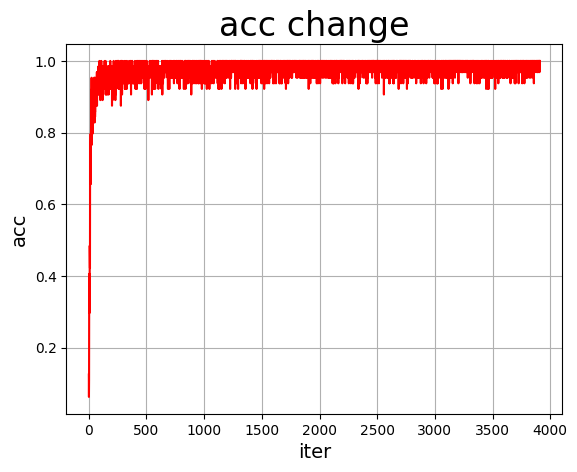

In [46]:
#visualization
import matplotlib.pyplot as plt
plt.figure()
plt.title("acc change", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("acc", fontsize=14)
plt.plot(acc_list,color='red',label='train loss') 
plt.grid()
plt.show()

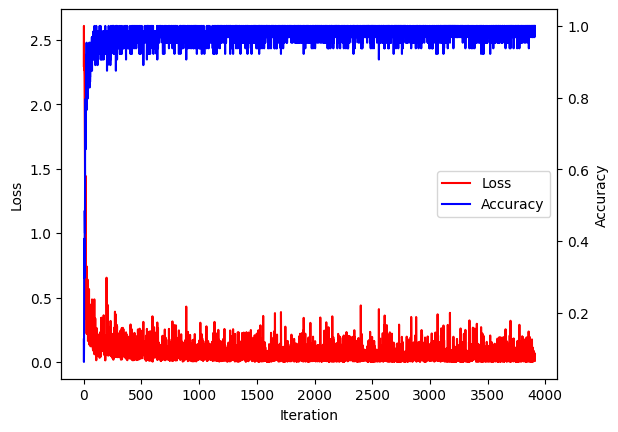

In [57]:
import matplotlib.pyplot as plt
# convert lists to tensors
loss_tensor = torch.tensor(loss_list)
acc_tensor = torch.tensor(acc_list)

# plot the loss on the left y-axis
fig, ax1 = plt.subplots()
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.plot(loss_tensor .detach().numpy(), color='red')

# plot the accuracy on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy')
ax2.plot(acc_tensor.detach().numpy(), color='blue')

# add legend to the graph
red_patch = plt.plot([],[], color='red', label='Loss')[0]
blue_patch = plt.plot([],[], color='blue', label='Accuracy')[0]
plt.legend(handles=[red_patch, blue_patch], loc='center right')

# display the graph
plt.show()

### Dropout
Dropout is a regularization technique for neural networks that can be easily implemented in PyTorch using the `nn.Dropout` or `nn.Dropout2d` layers. You can add these layers to your model, specifying the dropout probability as a parameter. During training, dropout is applied, and some neurons are deactivated randomly. During evaluation, all neurons are active, and the output is scaled accordingly.

Note that dropout is only active during training. When you call `model.eval()`, dropout is deactivated, and all neurons are active during evaluation.

Both `nn.Dropout` and `F.dropout` are used for applying dropout in a neural network. The main difference between them lies in how they are used.

`nn.Dropout` is a class and is used as a layer in a neural network model. It is part of the `torch.nn` module and is typically defined within the model's `__init__` method, along with other layers. During the forward pass, it is applied as a function to the input tensor:

```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.dropout(x)
        return x
```

`F.dropout` is a function from the `torch.nn.functional` module. It is used directly in the forward pass of a model, without needing to be defined as a layer in the `__init__` method:

```python
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

    def forward(self, x):
        x = F.dropout(x, p=0.5, training=self.training)
        return x
```

Both methods achieve the same result, and which one to use depends on personal preference and coding style. Using `nn.Dropout` is more object-oriented and keeps the layer definition and forward pass more consistent. On the other hand, using `F.dropout` can be more convenient for simple models where defining an extra layer might be unnecessary.

In [40]:
class MNISTOPTM_dropout(nn.Module):
    def __init__(self):
        super(MNISTOPTM_dropout,self).__init__()

        self.conv1=nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool1=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(in_channels=20,out_channels=20,kernel_size=5,stride=1,padding=2)
        self.max_pool2=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc=nn.Linear(in_features=980,out_features=10)

    def forward(self,inputs,labels=None):
        x=self.conv1(inputs)
        x=F.relu(x)
        x=self.max_pool1(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=self.max_pool2(x)
        x=torch.flatten(x, start_dim=1)
        x=self.fc(x)
        output=F.dropout(x,p=0.01,training=self.training)
        #finds the index (class) with the highest output value for each input image in the batch.
        #element-wise comparison
        #the proportion of correct predictions (1.0 values) in the batch
        #acc=(predicts.argmax(dim=1)==labels).float().mean()(if in batch)
        if labels is not None:
            acc = (torch.argmax(F.softmax(output, dim=1), dim=1)==labels).float().mean()
            return x, acc
        else:
            return x
    

In [41]:
model = MNISTOPTM_dropout()
train(model)

epoch: 0, batch: 0, loss is: 2.304152727127075, accuracy is: 0.109375
epoch: 0, batch: 200, loss is: 0.05640440061688423, accuracy is: 0.96875
epoch: 0, batch: 400, loss is: 0.10675356537103653, accuracy is: 0.953125
epoch: 0, batch: 600, loss is: 0.017387734726071358, accuracy is: 0.984375
epoch: 1, batch: 0, loss is: 0.04080602899193764, accuracy is: 0.96875
epoch: 1, batch: 200, loss is: 0.10724537074565887, accuracy is: 0.953125
epoch: 1, batch: 400, loss is: 0.21321852505207062, accuracy is: 0.9375
epoch: 1, batch: 600, loss is: 0.06859254091978073, accuracy is: 0.984375
epoch: 2, batch: 0, loss is: 0.04501955956220627, accuracy is: 0.984375
epoch: 2, batch: 200, loss is: 0.008788004517555237, accuracy is: 1.0
epoch: 2, batch: 400, loss is: 0.009211237542331219, accuracy is: 1.0
epoch: 2, batch: 600, loss is: 0.029792508110404015, accuracy is: 0.984375
epoch: 3, batch: 0, loss is: 0.014615083113312721, accuracy is: 1.0
epoch: 3, batch: 200, loss is: 0.008629399351775646, accuracy 

#### Up\downscale
In the context of dropout, the terms upscale_in_train and downscale_in_infer refer to strategies for adjusting the output during training and inference, respectively. These strategies ensure that the expected output from the dropout layer remains consistent between training and inference.

1. upscale_in_train: During training, the dropout layer multiplies the output of the remaining active neurons by the inverse of the dropout rate (1 / (1 - dropout_rate)). This scaling factor helps maintain the expected output value, as some neurons are deactivated (dropped out) during training. By doing this, the dropout layer compensates for the reduced number of active neurons, ensuring that the overall output from the layer remains consistent.  train: out = input*mask/(1.0-p); inference:out=input

2. downscale_in_infer: During inference (or evaluation), the dropout layer is disabled, and all neurons are active. In this case, the dropout layer multiplies the output of each neuron by the keep probability (1 - dropout_rate), effectively downscaling the output to match the expected output value during training. train: out=input*mask; inference: out=input*(1.0-p)

In PyTorch, dropout is implemented using the `nn.Dropout` module, which takes care of the scaling factor automatically. You don't need to explicitly handle upscale_in_train or downscale_in_infer. 

Determining the optimal dropout probability is usually done through experimentation, as it may depend on the specific problem, the dataset, and the model architecture. However, there are some general guidelines you can follow:

1. Start with a moderate dropout rate: A common starting point for dropout probability is 0.5. This means that, on average, half of the neurons will be dropped out during training at each layer where dropout is applied. You can use this as a starting point and then adjust the probability based on your model's performance on the validation set.

2. Monitor overfitting: Dropout is used to prevent overfitting, so you can experiment with different dropout rates and observe their effect on the gap between training and validation performance. If your model is overfitting, you can try increasing the dropout rate, whereas if your model is underfitting, you might want to decrease the dropout rate.

3. Experiment with different dropout rates: It's a good idea to try different dropout probabilities (e.g., 0.3, 0.4, 0.5, 0.6, 0.7) and compare the performance of the models on the validation set. Choose the dropout probability that results in the best performance on the validation set.

4. Use dropout in combination with other regularization techniques: Dropout can be used along with other regularization methods like L1 or L2 regularization, early stopping, or data augmentation. Combining these techniques may allow you to achieve better generalization and improved performance on the validation set.

Remember that finding the optimal dropout probability may require some trial and error. Don't hesitate to experiment with different values and observe their effect on your model's performance.
